In [1]:
import glob
from gwpy.timeseries import TimeSeriesDict
from lalframe.utils import frtools
import matplotlib.pyplot as plt

%matplotlib inline

## Load raw strain and cleaned strain

In [19]:
dc_source = glob.glob('/home/jerry/deepclean/infer/frames/*.gwf')
dc_source.sort()
dc_chlist = frtools.get_channels(dc_source[0])
org_source = glob.glob('/mnt/d/ll_data/K1_llhoft/*.gwf')
org_source.sort()
org_chlist = frtools.get_channels(org_source[0])

# start = int(dc_source[0].split('-')[-2])
# end = int(dc_source[-1].split('-')[-2])
start, duration = 1369300058, 128
end = start + duration
print(f'start:{start}, end:{end}\ndc_channels:{dc_chlist}\norg_channels:{org_chlist}')

org = TimeSeriesDict.read(
    org_source,
    org_chlist,
    start=start,
    end=end,
)

cleaned = TimeSeriesDict.read(
    dc_source,
    dc_chlist,
    start=start,
    end=end,
)

ts_org = org['K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ']
ts_dc = cleaned['K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_DEEPCLEAN_PRODUCTION_OUT_DQ']
ts_org = ts_org.resample(ts_dc.sample_rate)
ts_org.override_unit('NONE')
ts_dc.override_unit('NONE')
pred = ts_org - ts_dc

start:1369300058, end:1369300186
dc_channels:['K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_DEEPCLEAN_CANARY', 'K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_DEEPCLEAN_PRODUCTION', 'K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_DEEPCLEAN_PRODUCTION_OUT_DQ']
org_channels:['K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ', 'K1:DET-DQ_STATE_VECTOR', 'K1:GRD-IFO_STATE_N']


## Calculate ASD

In [20]:
fftlength = 16
org_asd = org[org_chlist[0]].asd(
    fftlength=fftlength,
    overlap=fftlength/2,
    method='median'
)

canary_asd = cleaned[dc_chlist[0]].asd(
    fftlength=fftlength,
    overlap=fftlength/2,
    method='median'
)

production_asd = cleaned[dc_chlist[1]].asd(
    fftlength=fftlength,
    overlap=fftlength/2,
    method='median'
)

dq_asd = cleaned[dc_chlist[2]].asd(
    fftlength=fftlength,
    overlap=fftlength/2,
    method='median'
)

pred_asd = pred.asd(
    fftlength=fftlength,
    overlap=fftlength/2,
    method='median'
)

## Plot ASD

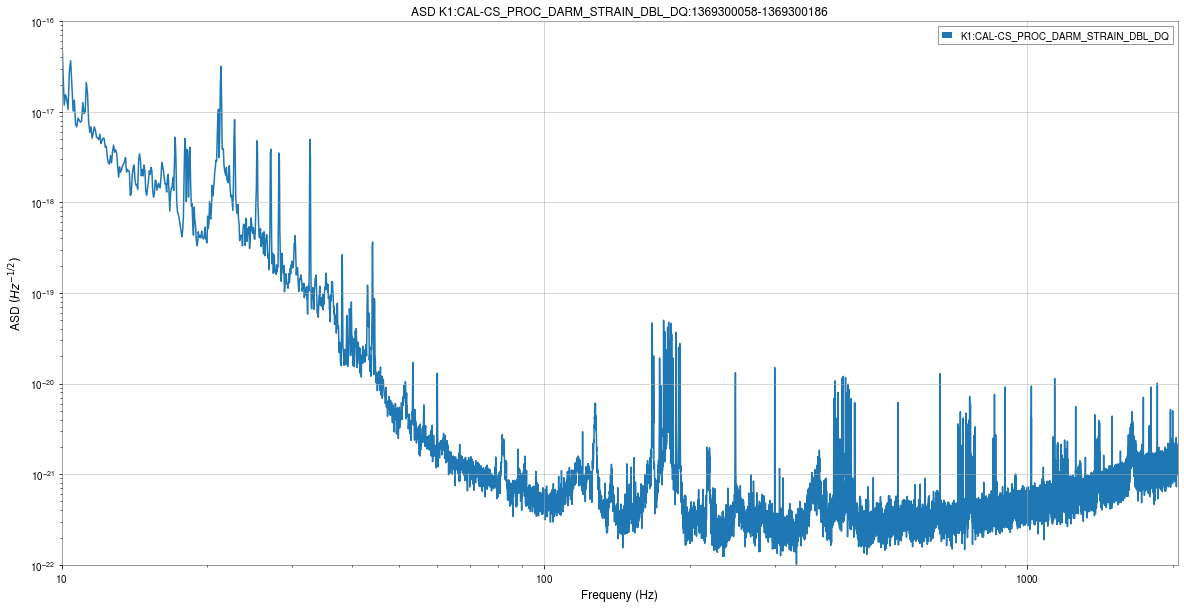

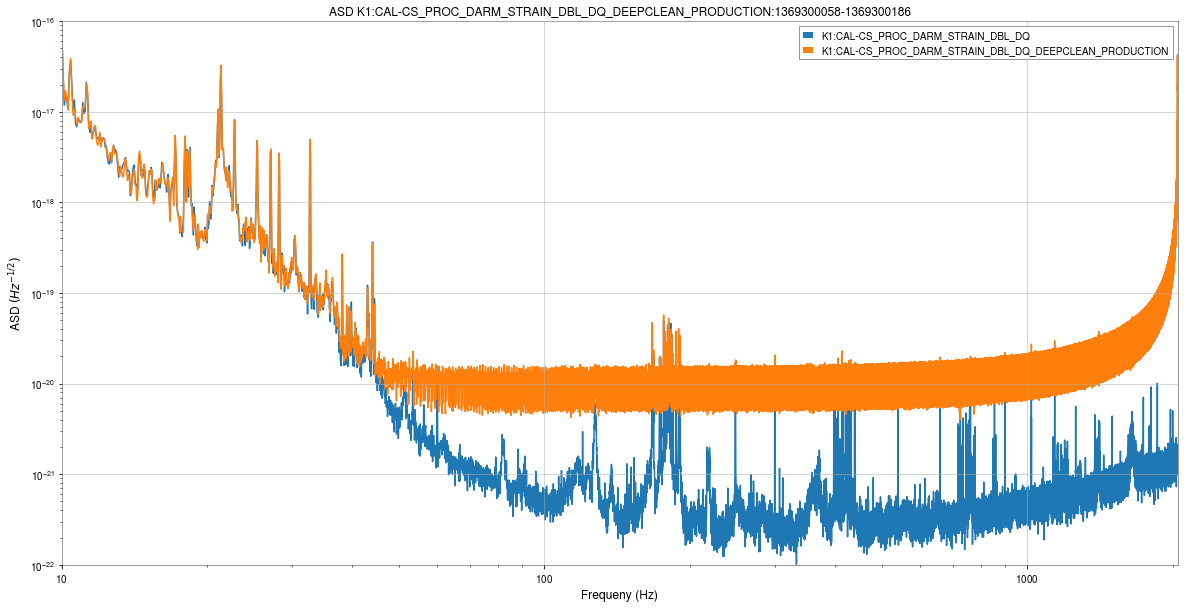

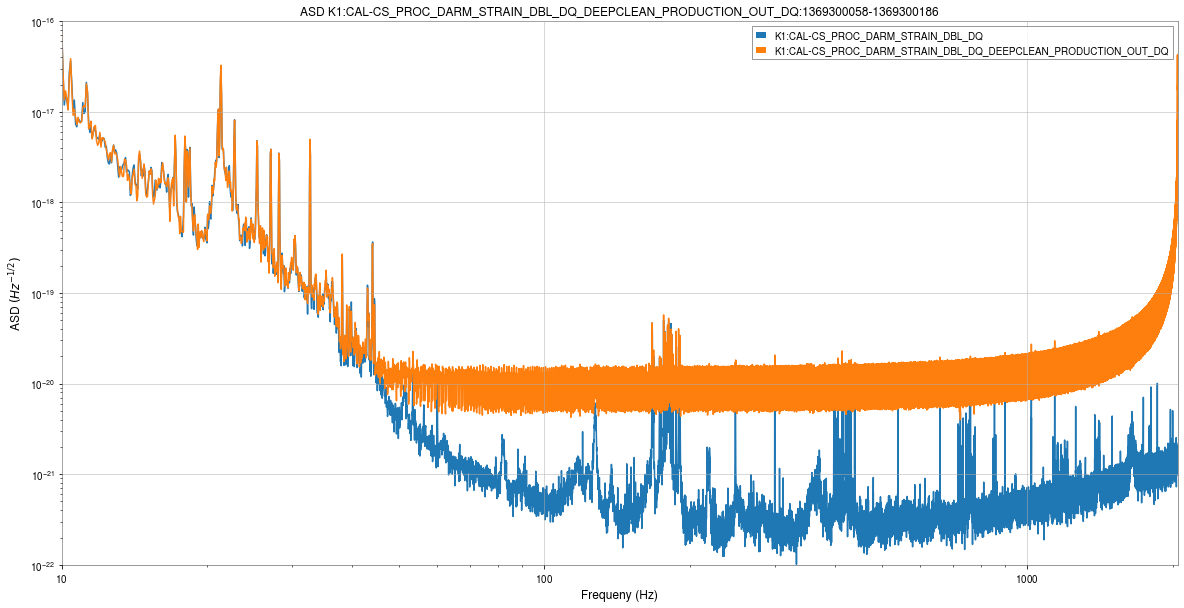

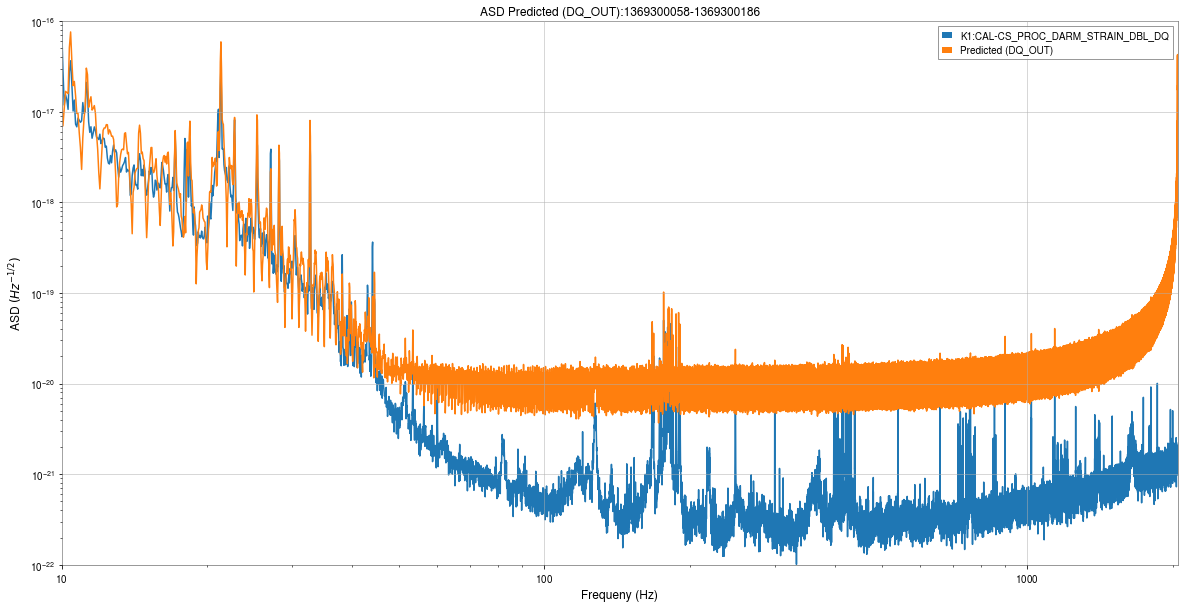

In [29]:
figsizel, figsizew = 20, 10
flow, fhigh = 10, 2048
alow, ahigh = 1e-22, 1e-16

plt.figure(figsize=(figsizel,figsizew))
plt.plot(org_asd.frequencies, org_asd, label=f'{org_chlist[0]}')
plt.title(f'ASD {org_chlist[0]}:{start}-{end}')
plt.xlabel('Frequeny (Hz)')
plt.ylabel(r'ASD $(Hz^{-1/2})$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([flow,fhigh])
plt.ylim([alow,ahigh])
plt.legend()
plt.show()

# plt.figure(figsize=(figsizel,figsizew))
# plt.plot(org_asd.frequencies, org_asd, label=f'{org_chlist[0]}')
# plt.plot(canary_asd.frequencies, canary_asd, label=f'{dc_chlist[0]}')
# plt.title(f'ASD {dc_chlist[0]}:{start}-{end}')
# plt.xlabel('Frequeny (Hz)')
# plt.ylabel(r'ASD $(Hz^{-1/2})$')
# plt.yscale('log')
# plt.xlim([flow,fhigh])
# plt.ylim([alow,ahigh])
# plt.legend()
# plt.show()

plt.figure(figsize=(figsizel,figsizew))
plt.plot(org_asd.frequencies, org_asd, label=f'{org_chlist[0]}')
plt.plot(production_asd.frequencies, production_asd, label=f'{dc_chlist[1]}')
plt.title(f'ASD {dc_chlist[1]}:{start}-{end}')
plt.xlabel('Frequeny (Hz)')
plt.ylabel(r'ASD $(Hz^{-1/2})$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([flow,fhigh])
plt.ylim([alow,ahigh])
plt.legend()
plt.show()

plt.figure(figsize=(figsizel,figsizew))
plt.plot(org_asd.frequencies, org_asd, label=f'{org_chlist[0]}')
plt.plot(dq_asd.frequencies, dq_asd, label=f'{dc_chlist[2]}')
plt.title(f'ASD {dc_chlist[2]}:{start}-{end}')
plt.xlabel('Frequeny (Hz)')
plt.ylabel(r'ASD $(Hz^{-1/2})$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([flow,fhigh])
plt.ylim([alow,ahigh])
plt.legend()
plt.show()

plt.figure(figsize=(figsizel,figsizew))
plt.plot(org_asd.frequencies, org_asd, label=f'{org_chlist[0]}')
plt.plot(pred_asd.frequencies, pred_asd, label=f'Predicted (DQ_OUT)')
plt.title(f'ASD Predicted (DQ_OUT):{start}-{end}')
plt.xlabel('Frequeny (Hz)')
plt.ylabel(r'ASD $(Hz^{-1/2})$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([flow,fhigh])
plt.ylim([alow,ahigh])
plt.legend()
plt.show()

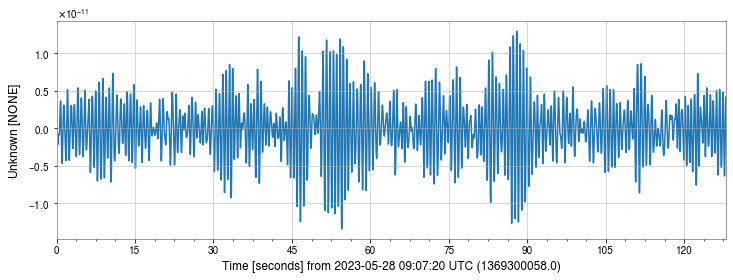

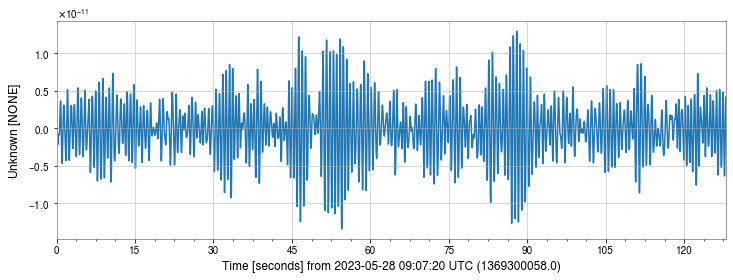

In [30]:
pred.plot()